In [2]:
import os
import sqlalchemy as sq
import pymysql.cursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
#DB_user = os.environ.get('MYSQL_USER')
#DB_pwd = os.environ.get('MYSQL_PASS')

#print(DB_user, DB_pwd)

None None


In [3]:
conn = pymysql.connect(host='localhost',
                      port=int(3306),
                      user='DB_user',
                      password='DB_pwd',
                      db='auto')

OperationalError: (1045, "Access denied for user 'DB_user'@'localhost' (using password: YES)")

In [4]:
conn

In [5]:
df=pd.read_sql('SELECT * FROM mpg',conn)
df.head()

/Users/gabirivera/opt/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11,70,1,plymouth satellite
3,16,8,304,150,3433,12,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


In [6]:
#General info of auto dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           392 non-null    int64 
 1   cylinders     392 non-null    int64 
 2   displacement  392 non-null    int64 
 3   horsepower    392 non-null    int64 
 4   weight        392 non-null    int64 
 5   acceleration  392 non-null    object
 6   model year    392 non-null    int64 
 7   origin        392 non-null    int64 
 8   car name      392 non-null    object
dtypes: int64(7), object(2)
memory usage: 27.7+ KB


In [7]:
#Weight has the highes negative correlation with mpg at 83.15% followed by displacemnt at 80.43%.

df.corr()

,mpg,cylinders,displacement,horsepower,weight,model year,origin
mpg,1.000000,-0.776796,-0.804304,-0.777683,-0.831535,0.582750,0.563667
cylinders,-0.776796,1.000000,0.950823,0.842983,0.897527,-0.345647,-0.568932
displacement,-0.804304,0.950823,1.000000,0.897259,0.932993,-0.369873,-0.614551
horsepower,-0.777683,0.842983,0.897259,1.000000,0.864538,-0.416361,-0.455171
weight,-0.831535,0.897527,0.932993,0.864538,1.000000,-0.309120,-0.585005
model year,0.582750,-0.345647,-0.369873,-0.416361,-0.309120,1.000000,0.181528
origin,0.563667,-0.568932,-0.614551,-0.455171,-0.585005,0.181528,1.000000


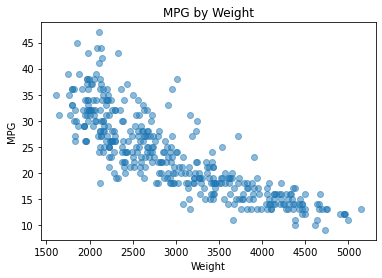

In [8]:
#Plot of mpg by weight

plt.scatter(df['weight'],df['mpg'], alpha=0.5)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('MPG by Weight')
plt.show()

In [9]:
#Regression line equation for MPG by Weight
#mpg= 46.23 -0.0076weight

weight = sm.add_constant(df['weight'])
w = sm.OLS(df['mpg'],weight).fit()
w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     874.0
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          1.27e-101
Time:                        15:38:46   Log-Likelihood:                -1130.5
No. Observations:                 392   AIC:                             2265.
Df Residuals:                     390   BIC:                             2273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2287      0.800     57.809      0.000      44.657      47.801
weight        -0.0076      0.000    -29.563      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.521   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.131
Skew:                           0.712   Prob(JB):                     2.38e-13
Kurtosis:                       4.239   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

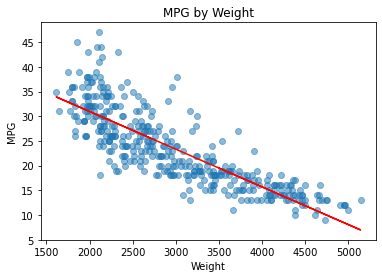

In [10]:
#Plot of mpg by weight with regression line
plt.scatter(df['weight'],df['mpg'], alpha=0.5)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('MPG by Weight')

m, b = np.polyfit(df['weight'], df['mpg'], 1)

plt.plot(df['weight'], m*df['weight'] + b, 
         color = 'red')

plt.show()

In [11]:
#Define variables for multiple linear regression

x = df[['weight','displacement']]
y = df[['mpg']]

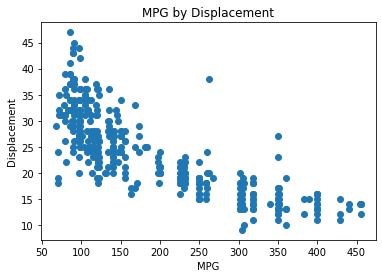

In [12]:
#Plot mpg by displacement

plt.scatter(df['displacement'],df['mpg'])
plt.title('MPG by Displacement')
plt.xlabel('MPG')     
plt.ylabel('Displacement')           
plt.show()

In [42]:
#Multi linear regression line equation
#mpg= 43.81 - 0.0058weight - 0.0164displacement

#x = sm.add_constant(x)
#lin_model_results = OLS(y,x).fit()
#lin_model_results.summary()

lin_mod = (smf.ols(formula='mpg ~ weight + displacement', data = df)).fit()
lin_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     448.9
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          8.72e-102
Time:                        15:33:22   Log-Likelihood:                -1126.4
No. Observations:                 392   AIC:                             2259.
Df Residuals:                     389   BIC:                             2271.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       43.8052      1.165     37.610      0.000      41.515      46.095
weight          -0.0058      0.001     -8.086      0.000      -0.007      -0.004
displacement    -0.0164      0.006     -2.840      0.005      -0.028      -0.005
==============================================================================
Omnibus:                       44.856   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.316
Skew:                           0.753   Prob(JB):                     2.41e-15
Kurtosis:                       4.362   Cond. No.                     1.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""